In [1]:
# Import the packages and make sure they are actually loaded new
%reload_ext autoreload
%autoreload 2
from gunpowder_augmentor import prepare_gunpowder_pipeline
import matplotlib.pyplot as plt
import numpy as np
import gunpowder as gp

In [2]:
#load_path = '/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr'
load_path = ['/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr',
             '/mnt/efs/shared_data/hack/data/20230504/20230504_raw.zarr']
fov_list = [[0,1,2,3], [1,2,3]]

output_shape = (20, 265, 265)
stack_size = 6
device = 'cpu'

pipeline, request = prepare_gunpowder_pipeline(load_path, fov_list, output_shape, device) #stack_size 


# Build the pipeline and request the batch
with gp.build(pipeline):
    batch = pipeline.request_batch(request)

# Move the batch data to the specified device
#if device == 'cuda':
 #   batch[raw].data = torch.from_numpy(batch[raw].data).cuda()
  #  batch[gt].data = torch.from_numpy(batch[gt].data).cuda()


print("Raw shape: " + str(batch[gp.ArrayKey('RAW')].data.shape))
print("Ground truth shape: " + str(batch[gp.ArrayKey('GROUND_TRUTH')].data.shape))

/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr
fovs:[0, 1, 2, 3]
/mnt/efs/shared_data/hack/data/20230504/20230504_raw.zarr
fovs:[1, 2, 3]
Raw shape: (20, 265, 265)
Ground truth shape: (20, 265, 265)


/home/laurab/conda/envs/zarr/lib/python3.10/site-packages/gunpowder/nodes/noise_augment.py:61: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  raw.data = skimage.util.random_noise(


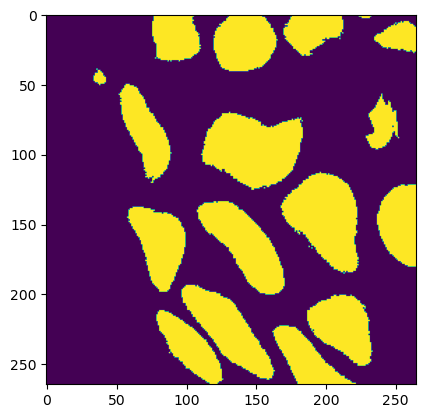

In [3]:
fg_data = batch[gp.ArrayKey('FOREGROUND')].data
plt.imshow(fg_data[10])

NameError: name 'index_to_plot' is not defined

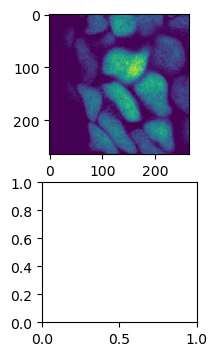

In [4]:
# Load the raw and gt data as arraykey
raw_data = batch[gp.ArrayKey('RAW')].data
gt_data = batch[gp.ArrayKey('GROUND_TRUTH')].data

# Select the z-slice (e.g., the middle one), for 3D data
z_slice = raw_data.shape[0] // 2  # Assuming the z-dimension is the first dimension

# Select the stack images for both raw and GT
raw_image = raw_data[z_slice, :, :]
gt_image = gt_data[z_slice, :, :]

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(2, 4))

# Plot raw image
raw_min, raw_max = np.min(raw_image), np.max(raw_image)
axes[0].imshow(raw_image, cmap='viridis', vmin=raw_min, vmax=raw_max)
axes[0].set_title(f'Raw Image {index_to_plot+1}')
axes[0].axis('off')

# Plot GT image
gt_min, gt_max = np.min(gt_image), np.max(gt_image)
axes[1].imshow(gt_image, cmap='viridis', vmin=0, vmax=1)
axes[1].set_title(f'GT Image {index_to_plot+1}')
axes[1].axis('off')

# Show the plot
plt.show()
